In [ ]:
#Goal: Discover any hidden categories based on Annual Income and Spending Score

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


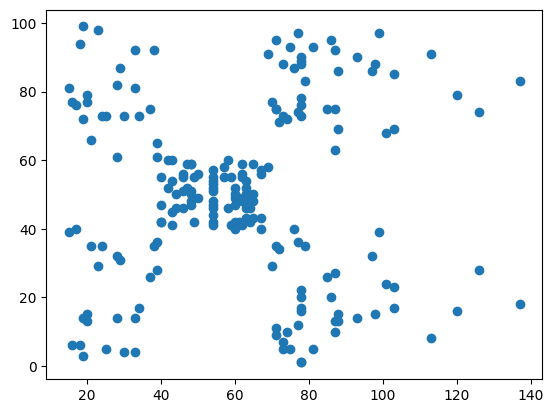

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [38]:
features = data.iloc[:,[2,3,4]].values

In [6]:
# Expectation from Unsupervised Learning
# 1. Identify how many number of hidden categories are present.
# 2. Grouping each datapoint to their respective category.

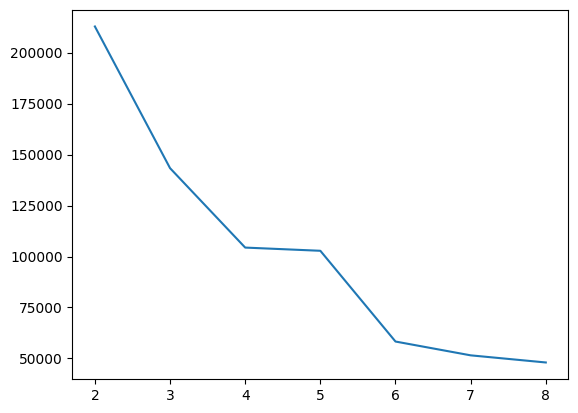

In [39]:
# 1. Identify how many number of hidden categories are present.

# Get WCSS (WithIn Cluster Sum of Square) -- Error Metric

# THE ELBOW METHOD
from sklearn.cluster import KMeans

wcss = []

for category in range(2,9):
  model = KMeans(n_clusters=category)
  model.fit(features)
  wcss.append(model.inertia_)

plt.plot(range(2,9) , wcss)

In [40]:
#Model Building

finalModel = KMeans(n_clusters=6)
finalModel.fit(features)

KMeans(n_clusters=6)

In [42]:
# Predict Labels/Groups

labelData = finalModel.predict(features)

In [43]:
labelData

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 1,
       3, 1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 1,
       5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1,
       1, 5, 5, 1, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       5, 1, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [47]:
finalDataset = data.iloc[:,[2,3,4]]
finalDataset['category'] = labelData
finalDataset

<ipython-input-47-dd1cda38793a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDataset['category'] = labelData


Age  Annual Income (k$)  Spending Score (1-100)  category
0     19                  15                      39         3
1     21                  15                      81         1
2     20                  16                       6         3
3     23                  16                      77         1
4     31                  17                      40         3
..   ...                 ...                     ...       ...
195   35                 120                      79         2
196   45                 126                      28         0
197   32                 126                      74         2
198   32                 137                      18         0
199   30                 137                      83         2

[200 rows x 4 columns]

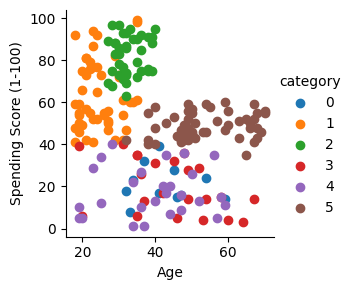

In [48]:
import seaborn as sns
sns.FacetGrid(finalDataset, hue='category').map(plt.scatter,'Age',	'Spending Score (1-100)').add_legend()

In [36]:
finalModel.cluster_centers_

array([[55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

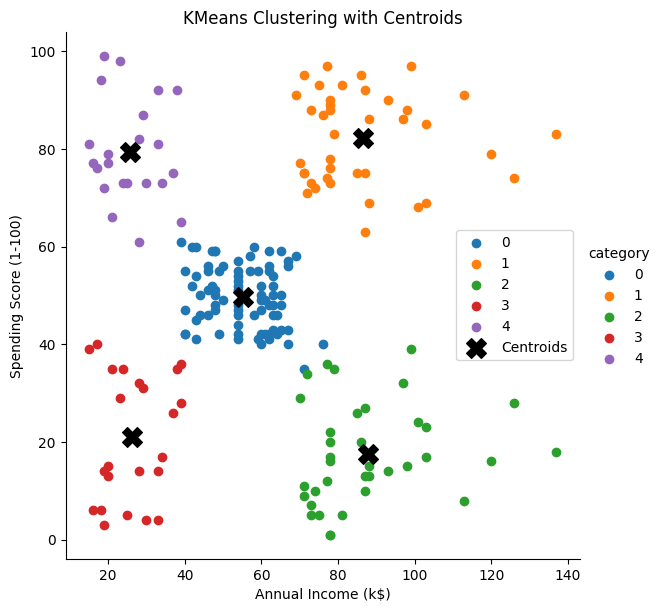

In [37]:
# Step 1: Create the FacetGrid plot
g = sns.FacetGrid(finalDataset, hue='category', height=6)
g.map(plt.scatter, 'Annual Income (k$)', 'Spending Score (1-100)').add_legend()

# Step 2: Extract cluster centers
centers = finalModel.cluster_centers_

# Step 3: Plot centroids on top of the existing axes
# 'g.ax' is the matplotlib Axes object used by the FacetGrid
g.ax.scatter(centers[:, 0], centers[:, 1],
             s=200, c='black', marker='X', label='Centroids')

# Optional: Add a legend entry for centroids (if not already shown)
g.ax.legend()
plt.title('KMeans Clustering with Centroids')
plt.show()

In [ ]:
#Identify and plot number of customer groups based on Customer Age and Customer Sspending Score